In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pandas import read_csv, set_option
from pandas.plotting import scatter_matrix
import seaborn as sns
from sklearn.preprocessing import StandardScaler
 
from sklearn.cluster import KMeans
from sklearn.metrics import adjusted_mutual_info_score
from sklearn import cluster, covariance, manifold

import matplotlib.ticker as ticker

In [2]:
stock = pd.read_csv('../data/SP500.csv',index_col=0)
stock

,ABT,ABBV,ABMD,ACN,ATVI,ADBE,AMD,AAP,AES,AMG,...,WLTW,WYNN,XEL,XRX,XLNX,XYL,YUM,ZBH,ZION,ZTS
Date,,,,,,,,,,,,,,,,,,,,,
2018-01-02,58.790001,98.410004,192.490005,153.839996,64.309998,177.699997,10.980000,106.089996,10.88,203.039993,...,146.990005,164.300003,47.810001,29.370001,67.879997,68.070000,81.599998,124.059998,50.700001,71.769997
2018-01-03,58.919998,99.949997,195.820007,154.550003,65.309998,181.039993,11.550000,107.050003,10.87,202.119995,...,149.740005,162.520004,47.490002,29.330000,69.239998,68.900002,81.529999,124.919998,50.639999,72.099998
2018-01-04,58.820000,99.379997,199.250000,156.380005,64.660004,183.220001,12.120000,111.000000,10.83,198.539993,...,151.259995,163.399994,47.119999,29.690001,70.489998,69.360001,82.360001,124.739998,50.849998,72.529999
2018-01-05,58.990002,101.110001,202.320007,157.669998,66.370003,185.339996,11.880000,112.180000,10.87,199.470001,...,152.229996,164.490005,46.790001,29.910000,74.150002,69.230003,82.839996,125.980003,50.869999,73.360001
2018-01-08,58.820000,99.489998,207.800003,158.929993,66.629997,185.039993,12.280000,111.389999,10.87,200.529999,...,151.410004,162.300003,47.139999,30.260000,74.639999,69.480003,82.980003,126.220001,50.619999,74.239998
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-10-07,81.040001,74.330002,164.429993,186.809998,55.410000,276.899994,28.930000,158.270004,15.85,74.830002,...,187.589996,107.019997,64.279999,29.830000,92.629997,75.570000,113.690002,134.500000,43.439999,126.070000
2019-10-08,78.510002,73.529999,159.490005,182.199997,54.130001,270.829987,28.230000,154.330002,15.51,71.800003,...,184.360001,102.570000,63.590000,28.309999,89.269997,73.430000,112.589996,131.220001,42.209999,125.379997
2019-10-09,79.500000,73.300003,159.309998,184.339996,53.430000,274.269989,28.459999,154.410004,15.54,72.250000,...,186.199997,104.419998,63.919998,28.760000,90.480003,74.570000,113.330002,133.419998,42.419998,126.430000


In [3]:
stock.describe()

,ABT,ABBV,ABMD,ACN,ATVI,ADBE,AMD,AAP,AES,AMG,...,WLTW,WYNN,XEL,XRX,XLNX,XYL,YUM,ZBH,ZION,ZTS
count,448.000000,448.000000,448.000000,448.000000,448.000000,448.000000,448.000000,448.000000,448.000000,448.000000,...,448.000000,448.000000,448.000000,448.000000,448.000000,448.000000,448.000000,448.000000,448.000000,448.000000
mean,70.934196,88.078013,307.303839,167.473750,59.630804,252.270603,21.804754,147.501428,14.534888,128.423750,...,165.139486,139.475335,51.671027,29.151071,90.774487,74.549040,93.492455,120.406161,49.230245,94.787232
std,9.015754,13.480891,71.989893,14.635497,13.119012,29.001055,7.425020,21.095302,2.266254,38.573308,...,17.383970,29.251895,6.650626,3.450413,21.081242,4.926937,11.958700,9.199975,4.820335,14.395919
min,56.270000,62.980000,159.309998,133.669998,40.110001,177.699997,9.530000,103.760002,10.060000,71.800003,...,134.839996,92.010002,42.130001,18.920000,62.820000,61.380001,76.300003,97.230003,38.509998,71.510002
25%,62.620001,78.657503,260.557487,157.280006,47.037500,235.377495,15.147500,133.307499,12.847500,94.059998,...,151.705002,114.085001,45.689999,27.139999,71.664999,70.547503,83.507502,114.030001,45.107500,84.557499
50%,70.014999,88.524998,301.940002,162.880005,55.269999,254.684998,21.885000,154.949997,14.830000,113.389999,...,158.809998,132.974998,49.370001,29.075000,85.195000,75.165001,89.930000,120.645000,49.184999,90.090000
75%,78.620003,96.667498,368.095001,178.337502,71.565002,272.989990,28.437500,163.614998,16.355000,158.855000,...,178.064999,164.927498,56.715001,31.455000,109.367500,78.359999,101.462500,125.850002,53.214999,101.970001
max,88.739998,123.209999,449.750000,201.119995,83.389999,311.269989,34.389999,184.720001,18.410000,215.759995,...,199.360001,201.509995,65.820000,36.480000,139.720001,84.410004,119.209999,142.610001,58.540001,128.470001


In [4]:
stock=stock.fillna(method='bfill')

In [5]:
print('Null Values =',stock.isnull().values.any())

Null Values = False


In [6]:
#Calculamos la media de retorno y volatilidad de cada acción en el periodo de un año, tener en cuenta que la bolsa está abierta 251 días (365-2*52-10)
returns = stock.pct_change().mean() * 251
data = pd.DataFrame(returns)
data.columns = ['Retorno']
data['Volatilidad'] = stock.pct_change().std() * np.sqrt(251)
data

,Retorno,Volatilidad
ABT,0.194343,0.218650
ABBV,-0.108585,0.326830
ABMD,0.045044,0.471401
ACN,0.125914,0.211479
ATVI,-0.017491,0.377451
...,...,...
XYL,0.103482,0.244002
YUM,0.205373,0.174906
ZBH,0.080085,0.231859
ZION,-0.045435,0.256582


In [7]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler().fit(data)
X = pd.DataFrame(scaler.fit_transform(data),columns = data.columns, index = data.index)

X

,Retorno,Volatilidad
ABT,0.800950,-0.690332
ABBV,-0.924132,0.802632
ABMD,-0.049262,2.797809
ACN,0.411267,-0.789286
ATVI,-0.405378,1.501240
...,...,...
XYL,0.283527,-0.340456
YUM,0.863764,-1.294018
ZBH,0.150286,-0.508037
ZION,-0.564515,-0.166845


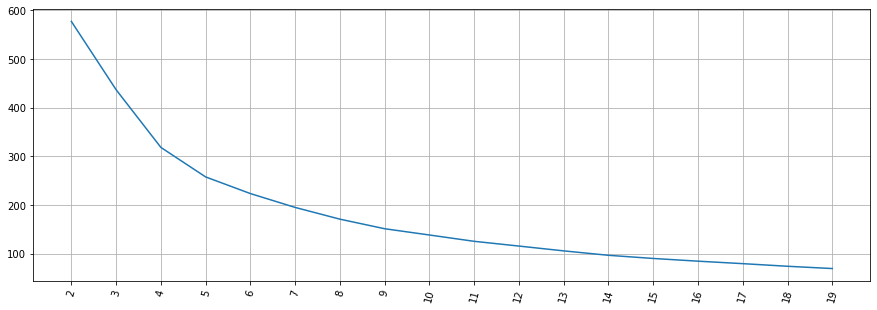

In [8]:
distorsions = []
max_loop=20
for k in range(2, max_loop):
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(X)
    distorsions.append(kmeans.inertia_)
fig = plt.figure(figsize=(15, 5))
plt.plot(range(2, max_loop), distorsions)
plt.xticks([i for i in range(2, max_loop)], rotation=75)
plt.grid(True)

In [9]:
nclust=6

In [10]:
k_means = cluster.KMeans(n_clusters=nclust)
k_means.fit(X)

KMeans(n_clusters=6)

In [11]:
target_labels = k_means.predict(X)
target_labels

array([5, 4, 3, 5, 4, 2, 3, 2, 2, 1, 5, 2, 5, 2, 4, 1, 5, 4, 3, 5, 4, 1,
       5, 5, 2, 2, 0, 2, 0, 5, 1, 5, 5, 0, 5, 5, 0, 4, 5, 5, 5, 2, 2, 0,
       5, 0, 1, 5, 2, 4, 4, 5, 4, 3, 5, 5, 5, 0, 3, 5, 2, 5, 0, 1, 2, 0,
       0, 5, 5, 5, 4, 1, 0, 4, 2, 0, 4, 5, 2, 0, 4, 2, 0, 1, 2, 4, 0, 1,
       4, 2, 0, 4, 0, 5, 0, 2, 2, 4, 4, 5, 1, 0, 4, 0, 2, 0, 3, 5, 2, 0,
       1, 5, 2, 2, 0, 0, 5, 0, 5, 5, 5, 0, 0, 5, 0, 4, 1, 4, 5, 0, 2, 2,
       4, 0, 5, 1, 5, 2, 0, 0, 4, 5, 5, 4, 4, 0, 4, 1, 1, 5, 0, 4, 4, 1,
       2, 4, 5, 5, 0, 5, 5, 5, 1, 1, 4, 0, 0, 4, 5, 4, 2, 4, 0, 5, 1, 5,
       5, 5, 5, 2, 5, 5, 5, 5, 2, 5, 5, 0, 0, 4, 2, 5, 1, 5, 0, 5, 5, 2,
       2, 2, 4, 0, 0, 2, 0, 0, 0, 0, 0, 1, 1, 2, 2, 0, 1, 0, 4, 5, 0, 5,
       2, 0, 2, 1, 1, 0, 5, 2, 2, 5, 1, 5, 5, 3, 4, 5, 4, 5, 5, 5, 5, 0,
       4, 0, 0, 0, 5, 2, 5, 0, 3, 5, 4, 5, 0, 4, 0, 0, 0, 2, 2, 1, 1, 2,
       0, 5, 2, 0, 0, 0, 5, 5, 0, 2, 0, 0, 2, 5, 5, 5, 2, 4, 1, 4, 1, 2,
       0, 3, 2, 4, 0, 5, 4, 5, 0, 5, 0, 5, 5, 2, 0,

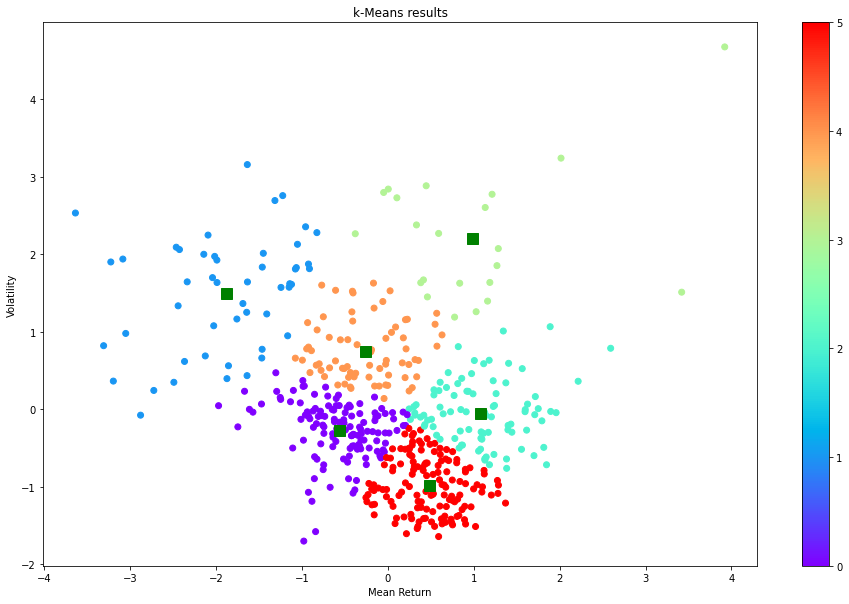

In [12]:
centroids = k_means.cluster_centers_
fig = plt.figure(figsize=(16,10))
ax = fig.add_subplot(111)
scatter = ax.scatter(X.iloc[:,0],X.iloc[:,1], c = k_means.labels_, cmap ="rainbow", label = X.index)
ax.set_title('k-Means results')
ax.set_xlabel('Mean Return')
ax.set_ylabel('Volatility')
plt.colorbar(scatter)

plt.plot(centroids[:,0],centroids[:,1],'sg',markersize=11)

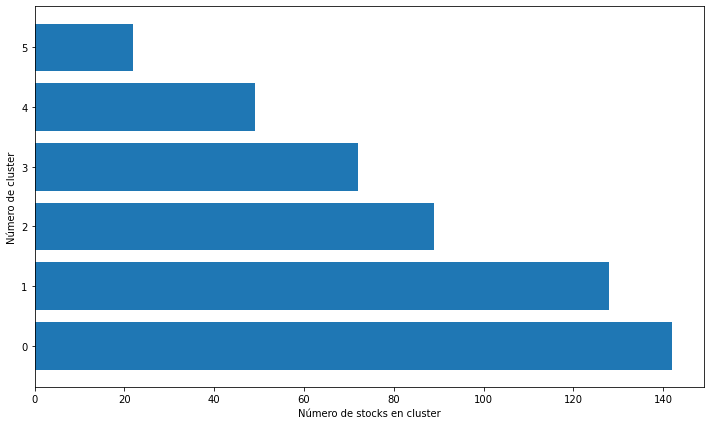

In [13]:
clustered_series = pd.Series(index=X.index, data=k_means.labels_.flatten())
clustered_series_all = pd.Series(index=X.index, data=k_means.labels_.flatten())
clustered_series = clustered_series[clustered_series != -1]

plt.figure(figsize=(12,7))
plt.barh(
    range(len(clustered_series.value_counts())),
    clustered_series.value_counts()
)
plt.xlabel('Número de stocks en cluster')
plt.ylabel('Número de cluster')
plt.show()

In [14]:
from sklearn import metrics
print("km", metrics.silhouette_score(X, k_means.labels_, metric='euclidean'))

km 0.3475880656030737


In [15]:
data['Clusters'] =target_labels
data

,Retorno,Volatilidad,Clusters
ABT,0.194343,0.218650,5
ABBV,-0.108585,0.326830,4
ABMD,0.045044,0.471401,3
ACN,0.125914,0.211479,5
ATVI,-0.017491,0.377451,4
...,...,...,...
XYL,0.103482,0.244002,5
YUM,0.205373,0.174906,5
ZBH,0.080085,0.231859,5
ZION,-0.045435,0.256582,0


In [16]:
cluster0=data[data.Clusters == 0]
a=cluster0.mean()
a

Retorno       -0.047236
Volatilidad    0.249465
Clusters       0.000000
dtype: float64

In [17]:
cluster1=data[data.Clusters == 1]
b=cluster1.mean()
b

Retorno       -0.276846
Volatilidad    0.377224
Clusters       1.000000
dtype: float64

In [18]:
cluster2=data[data.Clusters == 2]
c=cluster2.mean()
c

Retorno        0.242937
Volatilidad    0.265601
Clusters       2.000000
dtype: float64

In [19]:
cluster3=data[data.Clusters == 3]
d=cluster3.mean()
d

Retorno        0.225708
Volatilidad    0.429276
Clusters       3.000000
dtype: float64

In [20]:
cluster4=data[data.Clusters == 4]
e=cluster4.mean()
e

Retorno        0.007011
Volatilidad    0.323167
Clusters       4.000000
dtype: float64

In [21]:
cluster5=data[data.Clusters == 5]
f=cluster5.mean()
f

Retorno        0.137145
Volatilidad    0.197936
Clusters       5.000000
dtype: float64

In [22]:
cluster_output=pd.concat([a,b,c,d,e,f],axis=1)
cluster_output

,0,1,2,3,4,5
Retorno,-0.047236,-0.276846,0.242937,0.225708,0.007011,0.137145
Volatilidad,0.249465,0.377224,0.265601,0.429276,0.323167,0.197936
Clusters,0.000000,1.000000,2.000000,3.000000,4.000000,5.000000


In [23]:
cluster_output=cluster_output.drop(['Clusters'],axis=0)
cluster_output

,0,1,2,3,4,5
Retorno,-0.047236,-0.276846,0.242937,0.225708,0.007011,0.137145
Volatilidad,0.249465,0.377224,0.265601,0.429276,0.323167,0.197936


In [24]:
cluster_output=cluster_output.T
cluster_output

,Retorno,Volatilidad
0,-0.047236,0.249465
1,-0.276846,0.377224
2,0.242937,0.265601
3,0.225708,0.429276
4,0.007011,0.323167
5,0.137145,0.197936


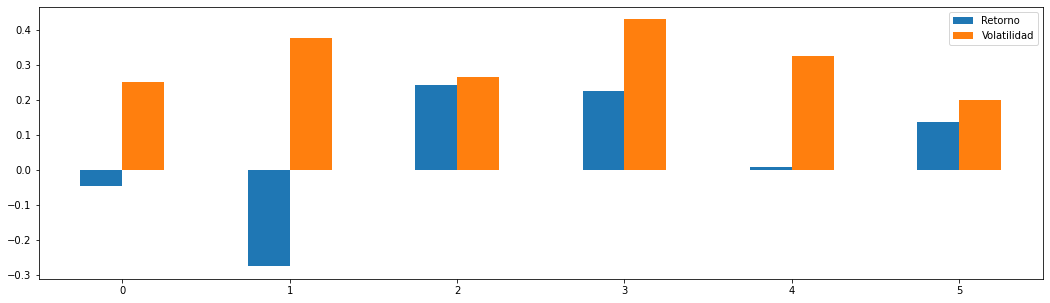

In [25]:
cluster_output[['Retorno','Volatilidad']].plot.bar(rot=0, figsize=(18,5));

In [61]:
stocks_moderado = cluster2.index.values
stocks_moderado

array(['ADBE', 'AAP', 'AES', 'A', 'AKAM', 'GOOGL', 'GOOG', 'AMZN', 'ADI',
       'ANSS', 'AAPL', 'AZO', 'BLL', 'BA', 'BSX', 'BR', 'CDNS', 'KMX',
       'CDW', 'CE', 'CHTR', 'CHD', 'CTAS', 'CSCO', 'COO', 'CPRT', 'CSX',
       'DG', 'EW', 'EL', 'EXPE', 'FAST', 'FISV', 'FLT', 'FLIR', 'FTNT',
       'GRMN', 'IT', 'GPN', 'GWW', 'HAS', 'HCA', 'IDXX', 'INTU', 'ISRG',
       'IQV', 'JEC', 'KSU', 'KEYS', 'KLAC', 'LHX', 'LW', 'LOW', 'MKTX',
       'MLM', 'MA', 'MKC', 'MSFT', 'MCO', 'MSI', 'MSCI', 'NKE', 'NSC',
       'NOC', 'NRG', 'ORLY', 'PYPL', 'PGR', 'RMD', 'ROST', 'CRM', 'SPGI',
       'SBUX', 'SNPS', 'TGT', 'TFX', 'TXN', 'TMO', 'TJX', 'TSCO', 'TDG',
       'UNP', 'UAL', 'UHS', 'VFC', 'VRSN', 'V', 'WCG', 'ZTS'],
      dtype=object)

In [64]:
np.save("stocks_moderados.npy", stocks_moderado)

In [27]:
stocks_conservador = cluster5.index.values
stocks_conservador

array(['ABT', 'ACN', 'AFL', 'APD', 'ARE', 'ALLE', 'LNT', 'ALL', 'AEE',
       'AEP', 'AXP', 'AMT', 'AWK', 'AME', 'AMGN', 'APH', 'AON', 'AIV',
       'ADM', 'AJG', 'AIZ', 'ATO', 'ADP', 'AVB', 'BAX', 'BBT', 'BDX',
       'BXP', 'CBRE', 'CNP', 'CB', 'CINF', 'CTXS', 'CME', 'CMS', 'KO',
       'CMCSA', 'ED', 'COST', 'CCI', 'DHR', 'DRI', 'DLR', 'D', 'DOV',
       'DTE', 'DUK', 'DRE', 'ECL', 'ETR', 'EFX', 'EQIX', 'EQR', 'ESS',
       'EVRG', 'ES', 'RE', 'EXC', 'EXPD', 'EXR', 'FRT', 'FIS', 'FE',
       'FRC', 'GPC', 'GL', 'HIG', 'HCP', 'HSIC', 'HSY', 'HLT', 'HOLX',
       'HD', 'HON', 'HRL', 'IEX', 'INFO', 'IR', 'ICE', 'JKHY', 'JCI',
       'JPM', 'KMB', 'KIM', 'KMI', 'LDOS', 'LLY', 'LIN', 'LMT', 'L',
       'MMC', 'MCD', 'MDT', 'MRK', 'MAA', 'MDLZ', 'NDAQ', 'NEE', 'NI',
       'OKE', 'ORCL', 'PAYX', 'PEP', 'PFE', 'PNW', 'PPL', 'PG', 'PLD',
       'PEG', 'PSA', 'DGX', 'RTN', 'O', 'REG', 'RSG', 'ROL', 'ROP',
       'SBAC', 'SRE', 'SHW', 'SO', 'SYK', 'SYY', 'TMUS', 'TRV', 'UDR',
       'USB', 'U

In [65]:
np.save("stocks_conservadores.npy", stocks_conservador)

In [28]:
stocks_agresivo = cluster3.index.values
stocks_agresivo

array(['ABMD', 'AMD', 'ALGN', 'ANET', 'ADSK', 'CMG', 'HES', 'ILMN',
       'LRCX', 'MU', 'NFLX', 'NVDA', 'QRVO', 'STX', 'SYMC', 'TTWO',
       'TWTR', 'TRIP', 'ULTA', 'UAA', 'UA', 'XLNX'], dtype=object)

In [66]:
np.save("stocks_agresivos.npy", stocks_agresivo)

In [41]:
import copy
stocks_agresivos_df = copy.deepcopy(stock)  

In [42]:
drop_lista1 = [i for i in stocks_agresivos_df.columns if i not in stocks_agresivo]

stocks_agresivos_df=stocks_agresivos_df[stocks_agresivo]
    

In [43]:
stocks_agresivos_df['Valor_1_stock_de_cada'] = stocks_agresivos_df.sum(axis=1)
stocks_agresivos_df

,ABMD,AMD,ALGN,ANET,ADSK,CMG,HES,ILMN,LRCX,MU,...,STX,SYMC,TTWO,TWTR,TRIP,ULTA,UAA,UA,XLNX,Valor_1_stock_de_cada
Date,,,,,,,,,,,,,,,,,,,,,
2018-01-02,192.490005,10.980000,224.619995,231.029999,107.120003,292.950012,47.849998,224.029999,189.279999,43.669998,...,42.930000,28.910000,112.879997,24.510000,34.770000,229.630005,15.030000,13.970000,67.879997,2603.830019
2018-01-03,195.820007,11.550000,231.199997,235.600006,109.379997,309.000000,49.400002,230.320007,192.500000,44.980000,...,42.849998,28.910000,113.879997,24.450001,34.970001,245.119995,15.720000,14.400000,69.239998,2685.200010
2018-01-04,199.250000,12.120000,233.300003,232.690002,112.070000,307.109985,50.590000,232.990005,193.380005,46.880001,...,42.639999,28.969999,114.019997,23.990000,34.919998,244.880005,15.920000,14.750000,70.489998,2698.900001
2018-01-05,202.320007,11.880000,241.070007,236.770004,110.839996,313.790009,52.160000,228.169998,196.399994,45.799999,...,42.939999,29.510000,116.910004,24.320000,34.730000,237.960007,15.870000,14.730000,74.150002,2723.740023
2018-01-08,207.800003,12.280000,248.899994,251.059998,111.419998,318.470001,52.490002,227.059998,197.880005,45.549999,...,46.000000,29.570000,117.370003,24.590000,34.669998,231.139999,15.980000,14.780000,74.639999,2764.539995
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-10-07,164.429993,28.930000,184.509995,230.940002,147.559998,814.159973,62.700001,301.630005,232.139999,44.160000,...,53.619999,23.469999,122.989998,40.799999,38.799999,242.750000,19.100000,17.469999,92.629997,3395.539949
2019-10-08,159.490005,28.230000,184.300003,229.100006,145.649994,805.880005,62.119999,288.359985,227.699997,42.639999,...,51.209999,23.230000,119.449997,39.700001,37.230000,237.029999,19.010000,17.350000,89.269997,3327.359982
2019-10-09,159.309998,28.459999,189.210007,230.029999,148.369995,827.289978,64.349998,296.959991,233.130005,42.880001,...,52.169998,23.520000,121.870003,39.500000,37.419998,238.039993,19.469999,17.750000,90.480003,3381.739973


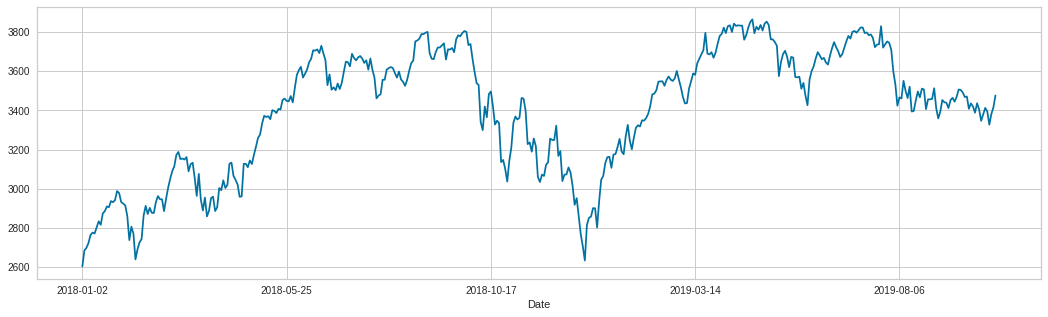

In [58]:
stocks_agresivos_df['Valor_1_stock_de_cada'].plot(rot=0, figsize=(18,5))
plt.savefig("Stocks agresivos.jpg")

In [45]:
stocks_moderados_df = copy.deepcopy(stock)

In [46]:
drop_lista2 = [i for i in stocks_moderados_df.columns if i not in stocks_moderado]

stocks_moderados_df=stocks_moderados_df[stocks_moderado]

In [47]:
stocks_moderados_df['Valor_1_stock_de_cada'] = stocks_moderados_df.sum(axis=1)
stocks_moderados_df

,ADBE,AAP,AES,A,AKAM,GOOGL,GOOG,AMZN,ADI,ANSS,...,TDG,UNP,UAL,UHS,VFC,VRSN,V,WCG,ZTS,Valor_1_stock_de_cada
Date,,,,,,,,,,,,,,,,,,,,,
2018-01-02,177.699997,106.089996,10.88,67.599998,65.559998,1073.209961,1065.000000,1189.010010,90.279999,148.550003,...,275.109985,135.779999,68.940002,115.599998,70.075333,109.470001,114.510002,202.550003,71.769997,14024.905272
2018-01-03,181.039993,107.050003,10.87,69.320000,65.940002,1091.520020,1082.479980,1204.199951,91.400002,151.419998,...,270.220001,136.539993,68.489998,113.389999,69.472694,110.900002,115.650002,203.320007,72.099998,14170.452651
2018-01-04,183.220001,111.000000,10.83,68.800003,65.599998,1095.760010,1086.400024,1209.589966,91.300003,151.820007,...,272.839996,135.800003,69.260002,112.790001,71.054611,111.470001,116.080002,206.509995,72.529999,14242.529650
2018-01-05,185.339996,112.180000,10.87,69.900002,65.830002,1110.290039,1102.229980,1229.140015,91.669998,152.449997,...,274.910004,137.529999,69.360001,111.970001,71.280602,113.000000,118.860001,211.320007,73.360001,14422.060676
2018-01-08,185.039993,111.389999,10.87,70.050003,65.879997,1114.209961,1106.939941,1246.869995,91.830002,153.710007,...,276.019989,139.440002,68.510002,110.150002,72.843689,114.309998,119.339996,205.990005,74.239998,14486.848580
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-10-07,276.899994,158.270004,15.85,75.099998,90.230003,1208.250000,1207.680054,1732.660034,110.839996,223.119995,...,514.419983,155.910004,84.849998,145.070007,88.300003,183.440002,174.899994,263.579987,126.070000,19520.720142
2019-10-08,270.829987,154.330002,15.51,72.489998,88.169998,1190.130005,1189.130005,1705.510010,106.129997,216.630005,...,508.660004,151.470001,84.690002,143.199997,86.970001,180.960007,172.419998,259.589996,125.379997,19215.240046
2019-10-09,274.269989,154.410004,15.54,73.470001,89.599998,1202.400024,1202.310059,1721.989990,108.070000,220.490005,...,509.149994,153.229996,86.459999,145.119995,88.449997,184.029999,174.880005,262.660004,126.430000,19427.990106


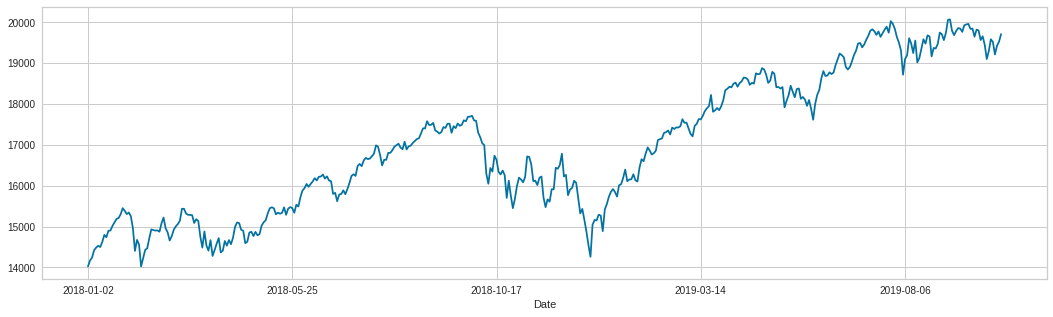

In [57]:
stocks_moderados_df['Valor_1_stock_de_cada'].plot(rot=0, figsize=(18,5))
plt.savefig("Stocks moderados.jpg")

In [49]:
stocks_conservadores_df = copy.deepcopy(stock)

In [50]:
drop_lista3 = [i for i in stocks_conservadores_df.columns if i not in stocks_conservador]

stocks_conservadores_df=stocks_conservadores_df[stocks_conservador]

In [51]:
stocks_conservadores_df['Valor_1_stock_de_cada'] = stocks_conservadores_df.sum(axis=1)
stocks_conservadores_df

,ABT,ACN,AFL,APD,ARE,ALLE,LNT,ALL,AEE,AEP,...,WM,WEC,WELL,WU,WLTW,XEL,XYL,YUM,ZBH,Valor_1_stock_de_cada
Date,,,,,,,,,,,,,,,,,,,,,
2018-01-02,58.790001,153.839996,43.985001,165.509995,129.929993,79.910004,42.110001,101.919998,58.389999,72.410004,...,86.099998,65.769997,64.029999,19.080000,146.990005,47.810001,68.070000,81.599998,124.059998,13716.113735
2018-01-03,58.919998,154.550003,44.115002,166.410004,129.320007,80.250000,41.740002,101.980003,58.090000,71.800003,...,87.349998,65.540001,64.139999,19.070000,149.740005,47.490002,68.900002,81.529999,124.919998,13774.330965
2018-01-04,58.820000,156.380005,44.570000,167.050003,126.739998,81.370003,41.250000,100.800003,57.430000,70.949997,...,88.099998,65.309998,62.759998,19.450001,151.259995,47.119999,69.360001,82.360001,124.739998,13777.378361
2018-01-05,58.990002,157.669998,44.865002,168.449997,127.000000,81.570000,41.080002,101.870003,57.389999,70.800003,...,87.989998,64.870003,62.369999,20.600000,152.229996,46.790001,69.230003,82.839996,125.980003,13826.798769
2018-01-08,58.820000,158.929993,44.980000,168.630005,127.279999,81.239998,41.540001,101.389999,58.070000,71.419998,...,88.050003,65.430000,62.590000,21.490000,151.410004,47.139999,69.480003,82.980003,126.220001,13868.352695
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-10-07,81.040001,186.809998,51.950001,213.960007,154.350006,102.580002,53.779999,107.459999,78.940002,93.709999,...,115.709999,95.220001,91.540001,23.320000,187.589996,64.279999,75.570000,113.690002,134.500000,17113.670029
2019-10-08,78.510002,182.199997,51.040001,207.759995,153.100006,102.330002,53.389999,105.900002,77.419998,92.559998,...,114.769997,94.169998,91.180000,23.160000,184.360001,63.590000,73.430000,112.589996,131.220001,16902.170006
2019-10-09,79.500000,184.339996,51.500000,211.740005,153.850006,101.040001,53.540001,106.570000,77.339996,92.879997,...,115.599998,94.889999,91.349998,23.379999,186.199997,63.919998,74.570000,113.330002,133.419998,17039.669966


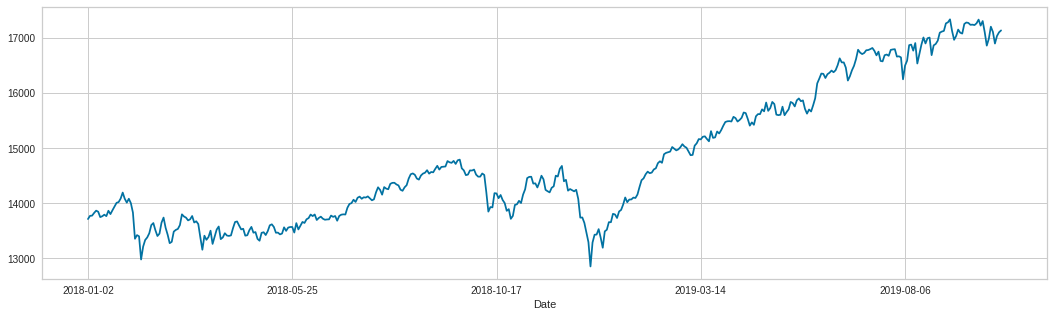

In [56]:
stocks_conservadores_df['Valor_1_stock_de_cada'].plot(rot=0, figsize=(18,5))
plt.savefig("Stocks conservadores.jpg")

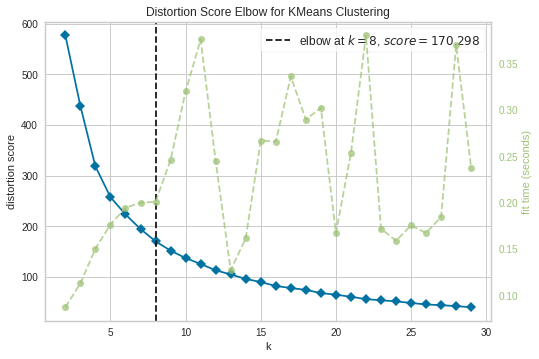

In [53]:
from yellowbrick.cluster import KElbowVisualizer

visualizer = KElbowVisualizer(kmeans, k=(2,30))

visualizer.fit(X)
visualizer.show();

In [72]:
import yfinance as yf

In [82]:
tickerData1 = yf.Ticker('VTI')
tickerDf1 = tickerData1.history(period='1d', start='2011-1-1', end='2021-5-13')
tickerDf1

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2010-12-31,53.298285,53.446290,53.232503,53.388733,5170800,0.0,0
2011-01-03,53.742309,54.169877,53.742309,53.939648,1465100,0.0,0
2011-01-04,54.120539,54.153429,53.479184,53.832752,1474900,0.0,0
2011-01-05,53.692988,54.153447,53.602540,54.128780,5170700,0.0,0
2011-01-06,54.194553,54.235661,53.890318,54.005432,4318100,0.0,0
...,...,...,...,...,...,...,...
2021-05-06,215.779999,216.949997,214.080002,216.910004,4131200,0.0,0
2021-05-07,217.399994,218.990005,217.100006,218.750000,3866300,0.0,0
2021-05-10,218.889999,218.899994,216.050003,216.179993,4443800,0.0,0


In [83]:
tickerData2 = yf.Ticker('TLT')
tickerDf2 = tickerData2.history(period='1d', start='2011-1-1', end='2021-5-13')
tickerDf2

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2010-12-31,71.586360,72.497358,71.532772,72.053345,8516000,0.0,0
2011-01-03,71.348988,72.198746,71.157601,71.509758,13799400,0.0,0
2011-01-04,71.509805,71.785396,71.127031,71.594009,10466900,0.0,0
2011-01-05,70.805496,70.958609,69.810288,70.016983,17568000,0.0,0
2011-01-06,70.078221,70.522240,69.787315,70.323196,9317500,0.0,0
...,...,...,...,...,...,...,...
2021-05-06,139.250000,140.190002,139.199997,139.919998,21907600,0.0,0
2021-05-07,140.100006,140.600006,138.910004,139.229996,18346200,0.0,0
2021-05-10,138.949997,139.250000,137.690002,137.820007,15146200,0.0,0


In [86]:
tickerData3 = yf.Ticker('IEI')
tickerDf3 = tickerData3.history(period='1d', start='2011-1-1', end='2021-5-13')
tickerDf3

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2010-12-31,99.377055,99.733117,99.377055,99.568115,32200,0.0,0
2011-01-03,99.316259,99.681008,99.220729,99.620216,88500,0.0,0
2011-01-04,99.698403,99.854725,99.550761,99.681030,40500,0.0,0
2011-01-05,99.212042,99.264154,98.968877,99.125198,66400,0.0,0
2011-01-06,99.264196,99.411832,99.177346,99.342354,231900,0.0,0
...,...,...,...,...,...,...,...
2021-05-06,130.600006,130.729996,130.600006,130.649994,569200,0.0,0
2021-05-07,130.910004,131.039993,130.750000,130.820007,1258600,0.0,0
2021-05-10,130.839996,130.889999,130.690002,130.720001,1044100,0.0,0


In [87]:
tickerData4 = yf.Ticker('GLD')
tickerDf4 = tickerData4.history(period='1d', start='2011-1-1', end='2021-5-13')
tickerDf4

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2010-12-31,137.779999,138.770004,137.720001,138.720001,9219800,0,0
2011-01-03,138.669998,139.000000,137.880005,138.000000,11510200,0,0
2011-01-04,136.240005,136.279999,134.160004,134.750000,26154300,0,0
2011-01-05,133.500000,134.679993,133.100006,134.369995,16700900,0,0
2011-01-06,134.050003,134.380005,133.139999,133.830002,15965300,0,0
...,...,...,...,...,...,...,...
2021-05-06,167.949997,170.289993,167.919998,170.059998,13574100,0,0
2021-05-07,171.529999,172.550003,171.000000,171.589996,14747700,0,0
2021-05-10,172.740005,172.839996,171.779999,172.110001,8276600,0,0


In [88]:
tickerData5 = yf.Ticker('GSG')
tickerDf5 = tickerData5.history(period='1d', start='2011-1-1', end='2021-5-13')
tickerDf5

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2010-12-31,33.500000,34.299999,33.480000,34.099998,321600,0,0
2011-01-03,34.529999,34.740002,34.299999,34.340000,337500,0,0
2011-01-04,34.250000,34.299999,33.389999,33.630001,967800,0,0
2011-01-05,33.369999,34.130001,33.290001,34.040001,271100,0,0
2011-01-06,34.029999,34.070000,33.430000,33.549999,606200,0,0
...,...,...,...,...,...,...,...
2021-05-06,15.490000,15.500000,15.380000,15.500000,2561600,0,0
2021-05-07,15.480000,15.610000,15.430000,15.560000,1533300,0,0
2021-05-10,15.670000,15.680000,15.410000,15.510000,1944900,0,0


In [95]:
tickerData6 = yf.Ticker('VNQ')
tickerDf6 = tickerData6.history(period='1d', start='2011-1-1', end='2021-5-13')
tickerDf6

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2010-12-31,36.806005,36.991793,36.693204,36.739651,1168500,0.0,0
2011-01-03,36.998427,37.449627,36.978522,37.423088,1957400,0.0,0
2011-01-04,37.476165,37.575695,36.494141,36.706470,2315700,0.0,0
2011-01-05,36.593686,36.912180,36.587049,36.839191,1512700,0.0,0
2011-01-06,36.938704,36.945341,36.474236,36.494141,1819300,0.0,0
...,...,...,...,...,...,...,...
2021-05-06,96.690002,97.239998,96.260002,97.160004,5649700,0.0,0
2021-05-07,97.230003,98.500000,97.070000,98.440002,5884900,0.0,0
2021-05-10,98.800003,99.570000,98.400002,98.410004,3436700,0.0,0


In [96]:
tickerData7 = yf.Ticker('VEU')
tickerDf7 = tickerData7.history(period='1d', start='2011-1-1', end='2021-5-13')
tickerDf7

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2010-12-31,35.122973,35.493313,35.122973,35.352585,774500,0.0,0
2011-01-03,35.648853,35.782176,35.611820,35.648853,1813800,0.0,0
2011-01-04,35.863659,35.915509,35.352592,35.582203,1005000,0.0,0
2011-01-05,35.160011,35.478503,35.130383,35.448875,1473200,0.0,0
2011-01-06,35.537764,35.537764,35.048916,35.152611,1523500,0.0,0
...,...,...,...,...,...,...,...
2021-05-06,62.700001,63.099998,62.500000,63.099998,2332800,0.0,0
2021-05-07,63.290001,63.869999,63.240002,63.799999,2762100,0.0,0
2021-05-10,63.869999,63.910000,63.220001,63.259998,2713400,0.0,0


In [101]:
tickerData8 = yf.Ticker('IJT')
tickerDf8 = tickerData8.history(period='1d', start='2011-1-1', end='2021-5-13')
tickerDf8

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2010-12-31,33.254957,33.259494,32.950821,32.950821,213600,0.0,0.0
2011-01-03,33.159628,33.672568,33.159628,33.481918,676600,0.0,0.0
2011-01-04,33.531855,33.595405,32.637611,32.950821,517200,0.0,0.0
2011-01-05,32.909970,33.268575,32.823722,33.259495,315200,0.0,0.0
2011-01-06,33.313952,33.336650,33.023436,33.127842,413600,0.0,0.0
...,...,...,...,...,...,...,...
2021-05-06,129.130005,129.729996,127.339996,129.679993,153200,0.0,0.0
2021-05-07,129.710007,131.240005,129.330002,130.809998,81700,0.0,0.0
2021-05-10,130.639999,130.759995,127.500000,127.540001,106800,0.0,0.0


In [107]:
tickerData9 = yf.Ticker('BTC-USD')
tickerDf9 = tickerData9.history(period='1d', start='2013-1-1', end='2021-5-13')
tickerDf9

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2014-09-17,465.864014,468.174011,452.421997,457.334015,21056800,0,0
2014-09-18,456.859985,456.859985,413.104004,424.440002,34483200,0,0
2014-09-19,424.102997,427.834991,384.532013,394.795990,37919700,0,0
2014-09-20,394.673004,423.295990,389.882996,408.903992,36863600,0,0
2014-09-21,408.084991,412.425995,393.181000,398.821014,26580100,0,0
...,...,...,...,...,...,...,...
2021-05-08,57352.765625,59464.613281,56975.210938,58803.777344,65382980634,0,0
2021-05-09,58877.390625,59210.882812,56482.003906,58232.316406,65906690347,0,0
2021-05-10,58250.871094,59519.355469,54071.457031,55859.796875,71776546298,0,0


In [100]:
b=tickerDf2['Close']*0.40+tickerDf1['Close']*0.3+tickerDf3['Close']*0.15+tickerDf4['Close']*0.075+tickerDf5['Close']*0.075
b

Date
2010-12-31     72.734675
2011-01-03     72.654330
2011-01-04     72.368084
2011-01-05     71.744957
2011-01-06     71.785761
                 ...    
2021-05-06    154.555499
2021-05-07    154.976249
2021-05-10    153.661501
2021-05-11    152.823747
2021-05-12    150.621001
Name: Close, Length: 2608, dtype: float64

In [97]:
a=tickerDf2['Close']*0.25+tickerDf1['Close']*0.3+tickerDf3['Close']*0.1+tickerDf4['Close']*0.05+tickerDf5['Close']*0.05+tickerDf6['Close']*0.1+tickerDf7['Close']*0.15
a

Date
2010-12-31     61.604620
2011-01-03     61.727992
2011-01-04     61.443409
2011-01-05     61.077150
2011-01-06     61.007970
                 ...    
2021-05-06    141.577000
2021-05-07    142.286000
2021-05-10    141.092000
2021-05-11    140.152498
2021-05-12    137.796001
Name: Close, Length: 2608, dtype: float64

In [110]:
a=tickerDf2['Close']*0.15+tickerDf1['Close']*0.35+tickerDf3['Close']*0.05+tickerDf4['Close']*0.05+tickerDf5['Close']*0.05+tickerDf6['Close']*0.1+tickerDf7['Close']*0.15+tickerDf8['Close']*0.1
a

Date
2010-12-31     55.385399
2011-01-03     55.641180
2011-01-04     55.286676
2011-01-05     55.151580
2011-01-06     55.021588
                 ...    
2021-05-06    144.866000
2021-05-07    145.840499
2021-05-10    144.336999
2021-05-11    143.334499
2021-05-12    140.473000
Name: Close, Length: 2608, dtype: float64

In [112]:
np.save("portfolio_agresivo.npy", a)

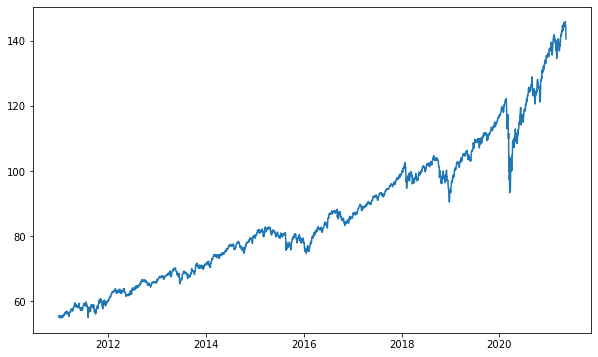

In [111]:
fig1, ax1 = plt.subplots(figsize=(10, 6))
ax1.plot(a)
